<a href="https://colab.research.google.com/github/sftSalman/CNN/blob/main/CNN_Step_by_Step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def zero_pad(X,pad):
#pad = np.pad(X,((0,0),(pad,pad),(pad,pad)(0,0)),'constant', constant_values =(0,0))
  X_pad = np.pad(X, ((0,0), (pad,pad), (pad,pad), (0,0)), 'constant', constant_values = (0,0))
  return X_pad

In [3]:
x = np.random.randn(4,3,3,2)
x_pad = zero_pad(x,2)
print(x.shape)
print(x_pad.shape)

(4, 3, 3, 2)
(4, 7, 7, 2)


In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

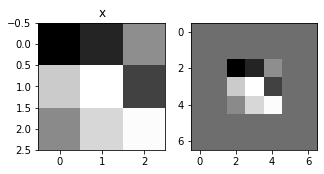

In [5]:
fig , ax = plt.subplots(1,2)
ax[0].set_title('x')
ax[0].imshow(x[0,:,:,0])
ax[1].imshow(x_pad[0,:,:,0])

In [6]:
print('hi')

hi


In [7]:
def conv_single_step(a_slice_prev,W,b):
  s = np.multiply(a_slice_prev,W)
  Z = np.sum(s)
  Z = Z+b
  return Z 

In [8]:
np.random.seed(3)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = [[[4.74084236]]]


In [12]:
def conv_forward(A_prev,W,b,hypermaters):
  (m,n_H_prev,n_W_prev,n_C_prev)=A_prev.shape
  (f,f,n_C_prev,n_C) = W.shape

  stride = hypermaters['stride']
  pad = hypermaters['pad']

  n_H = int((n_H_prev - f + 2 * pad) / stride + 1)
  n_W = int((n_W_prev - f + 2 * pad) / stride + 1) 

  Z = np.zeros((m, n_H, n_W, n_C))

  A_prev_pad = zero_pad(A_prev, pad)
  for i in range(m):
    for h in range(n_H):
      for w in range(n_W):
        for c in range(n_C):
          vert_start = h 
          vert_end = vert_start + f 
          horiz_start = w 
          horiz_end = horiz_start + f
          a_slice_prev = A_prev_pad[vert_start:vert_end,horiz_start:horiz_end,:]
          z[i,h,w,c] = conv_single_step(a_slice_prev,w[:,:,:,:],b[:,:,:,:])

          cache = (A_prev,W,b,hypermaters)




    return Z, cache


  

In [14]:
# GRADED FUNCTION: conv_forward

def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev -- output activations of the previous layer, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"
        
    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward() function
    """
    
    ### START CODE HERE ###
    # Retrieve dimensions from A_prev's shape (≈1 line)  
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve dimensions from W's shape (≈1 line)
    (f, f, n_C_prev, n_C) = W.shape
    
    # Retrieve information from "hparameters" (≈2 lines)
    stride = hparameters["stride"]
    pad = hparameters["pad"]
    
    # Compute the dimensions of the CONV output volume using the formula given above. Hint: use int() to floor. (≈2 lines)
    n_H = int((n_H_prev - f + 2 * pad) / stride + 1)
    n_W = int((n_W_prev - f + 2 * pad) / stride + 1)
    
    # Initialize the output volume Z with zeros. (≈1 line)
    Z = np.zeros((m, n_H, n_W, n_C))
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)
    
    for i in range(m):                               # loop over the batch of training examples
        a_prev_pad = A_prev_pad[i, :, :, :]          # Select ith training example's padded activation
        for h in range(n_H):                           # loop over vertical axis of the output volume
            for w in range(n_W):                       # loop over horizontal axis of the output volume
                for c in range(n_C):                   # loop over channels (= #filters) of the output volume
                    
                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = h
                    vert_end = vert_start + f
                    horiz_start = w
                    horiz_end = horiz_start + f
                    
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). (≈1 line)
                    a_slice_prev = a_prev_pad[vert_start: vert_end, horiz_start: horiz_end, :]
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. (≈1 line)
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, W[:, :, :, c], b[:, :, :, c])
                                        
    ### END CODE HERE ###
    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [16]:
print(W.shape)

(4, 4, 3)


In [17]:
np.random.seed(1)
A_prev = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 2,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =", np.mean(Z))
print("Z[3,2,1] =", Z[3,2,1])
print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])

Z's mean = -0.007801972093158612
Z[3,2,1] = [ 0.10709871 -0.03102354 -0.52995452  0.98611224  0.65733641 -0.84239368
 -0.04608241  0.08802027]
cache_conv[0][1][2][3] = [-0.20075807  0.18656139  0.41005165]


In [20]:
print(Z[:,3,2,1])

[ 1.67614161  0.28603831 -1.7404447   4.15371703  4.98966901 -3.74089771
 -4.23363174 -0.11889861  0.49030691  2.11276071]


In [21]:
print(Z[3,2,1])

[ 0.10709871 -0.03102354 -0.52995452  0.98611224  0.65733641 -0.84239368
 -0.04608241  0.08802027]


In [22]:
# GRADED FUNCTION: pool_forward

def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Retrieve dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    ### START CODE HERE ###
    for i in range(m):                         # loop over the training examples
        for h in range(n_H):                     # loop on the vertical axis of the output volume
            for w in range(n_W):                 # loop on the horizontal axis of the output volume
                for c in range (n_C):            # loop over the channels of the output volume
                    
                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = h
                    vert_end = vert_start + f
                    horiz_start = w
                    horiz_end = horiz_start + f
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = A_prev[i, : , : , c]
                    
                    # Compute the pooling operation on the slice. Use an if statment to differentiate the modes. Use np.max/np.mean.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice[vert_start:vert_end, horiz_start:horiz_end])
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice[vert_start:vert_end, horiz_start:horiz_end])    
    ### END CODE HERE ###
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [23]:
np.random.seed(1)
A_prev = np.random.randn(2, 4, 4, 3)
hparameters = {"stride" : 2, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A =", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A =", A)

mode = max
A = [[[[1.74481176 0.86540763 1.13376944]]]


 [[[1.13162939 1.51981682 2.18557541]]]]

mode = average
A = [[[[ 0.02105773 -0.20328806 -0.40389855]]]


 [[[-0.22154621  0.51716526  0.48155844]]]]
